<a href="https://colab.research.google.com/github/raphaelhazout/TensorFlow-Projects/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for our regression problem, but in our case, we're going to simplify it: predicting a numarical variable based on some other combination of variables, even shorter.. predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


# Creating data to view and fit

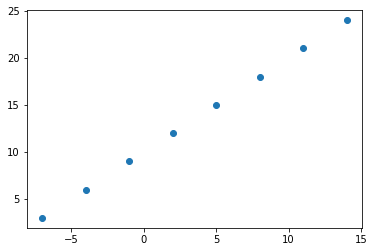

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])  # Independent variable

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # Dependent variable

# Visualize it
plt.scatter(X,Y);

In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
# Create a demo tensor for out housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
  X[0],Y[0]

(-7.0, 3.0)

In [ ]:
X[1],Y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], Y[0]\

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

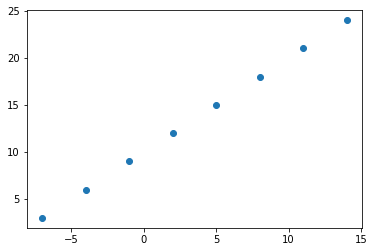

In [ ]:
plt.scatter(X,Y)

# Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (Features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is shor for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),  # SGD is shor for stochastic gradient descent , or just write optimizer="sgd"
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 635ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using a model
y_pred =model.predict([17.0])
y_pred

1/1 [==============================] - 0s 125ms/step


array([[12.716021]], dtype=float32)

# Improving our Model
To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's build our model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is shor for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),  # SGD is shor for stochastic gradient descent , or just write optimizer="sgd"
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 447ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] 

In [ ]:
y_pred =model.predict([17.0])
y_pred

1/1 [==============================] - 0s 108ms/step


array([[29.739855]], dtype=float32)

In [ ]:
# Let's build our model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is shor for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.1),  # SGD is shor for stochastic gradient descent , or just write optimizer="sgd"
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 763ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7706

In [ ]:
y_pred =model.predict([17.0])
y_pred

1/1 [==============================] - 0s 175ms/step


array([[27.497076]], dtype=float32)

In [ ]:
# Let's build our model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is shor for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr=0.1),  # SGD is shor for stochastic gradient descent , or just write optimizer="sgd"
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 939ms/step - loss: 13.6754 - mae: 13.6754
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 7.9051 - mae: 7.9051
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 8.0815 - mae: 8.0815
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 6.2750 - mae: 6.2750
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 6.4981 - mae: 6.4981
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 5.0235 - mae: 5.0235
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 3.1712 - mae: 3.1712
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 2.2181 - mae: 2.2181
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 1.3994 - mae: 1.3994
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 1.3920 - mae: 1.3920
Epoch 11/100
1/1 [==============================] - 0s 22ms/step -

In [ ]:
y_pred =model.predict([17.0])
y_pred

1/1 [==============================] - 0s 301ms/step


array([[25.692566]], dtype=float32)

# Evaluating a model

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

When it comes to evaluation, you'll want to remember the words:

> "**Visualize, Visualize, Visualize.**"

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
 # Make a bigger dataset
 X = tf.range(-100,100,4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
Y = X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

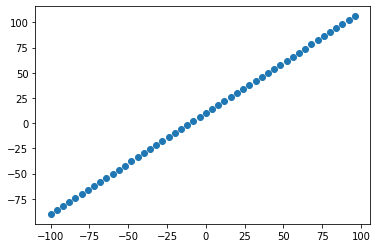

In [ ]:
# Visualize the data
plt.scatter(X,Y);


# The 3 Sets Consept

* **Training Set** - the model learn from this data, which is typically 70-80% of the total data you have available.(like the course materials you study during the semester).
* **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training sample (80% of the data)
Y_train = Y[:40]

X_test = X[40:] # last 10 are testing sample (20% of the data)
Y_test = Y[40:]
len(X_train), len(X_test),len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualing the data 
Now we've got our data in training test sets.. let's visualize it again!

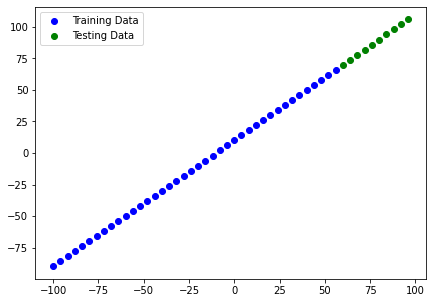

In [ ]:
plt.figure(figsize=(7,5))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training Data") # Out model will learn on this
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing Data") # want our model to be able predict this
# Show a legend
plt.legend();



In [ ]:
# Let's build a neural network for our data
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],name="input_layer")
], name="model_1")

#2. Compile the model
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mse"])

#3. Fit the model
# model.fit(X_train,Y_train,epochs=100)

### Visualizing the Model

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
#3. Fit the model
model.fit(X_train,Y_train,epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


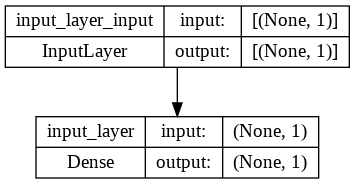

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Opten you'll see this in the form of Y_test or Y_true versus Y_pred (ground true versus your model's predictions).

In [ ]:
# Make some predictions
Y_preds= model.predict(X_test)
Y_preds


1/1 [==============================] - 0s 81ms/step


array([[ 70.183784],
       [ 74.19668 ],
       [ 78.20957 ],
       [ 82.22246 ],
       [ 86.235344],
       [ 90.24824 ],
       [ 94.26113 ],
       [ 98.27402 ],
       [102.2869  ],
       [106.2998  ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.**

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_preds):
  """
  Plots training data, test data and compared predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

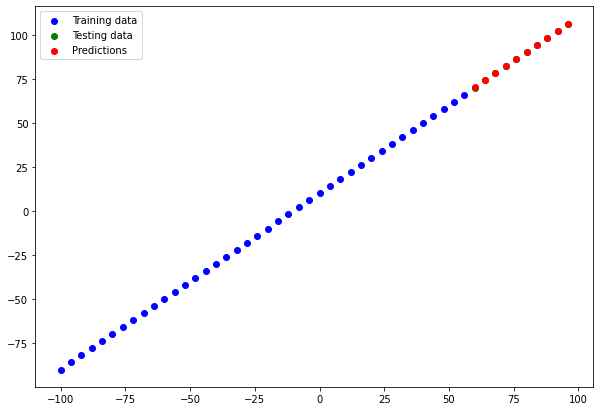

In [ ]:
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_preds)


### Evaluating our model's predictions with regression evaluation metrics
Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 260ms/step - loss: 0.0299 - mse: 0.0598


[0.029917120933532715, 0.05983424186706543]

In [ ]:
tf.squeeze(tf.constant(Y_preds))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.183784,  74.19668 ,  78.20957 ,  82.22246 ,  86.235344,
        90.24824 ,  94.26113 ,  98.27402 , 102.2869  , 106.2998  ],
      dtype=float32)>

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_true=Y_test,y_pred=tf.squeeze(tf.constant(Y_preds)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.24179229>

In [ ]:
# Calculate the mean square error
tf.metrics.mean_squared_error(y_true=Y_test,y_pred=tf.squeeze(tf.constant(Y_preds)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.059834242>

In [ ]:
# Make some function reuse MAE and MSE
def mae(y_true, y_pred):
  return (tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))).numpy()

def mse(y_true,y_pred):
  return (tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))).numpy()


### Running experiments to imporve our model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

* **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
* **Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* **Train for longer** - give your model more of a chance to find the patterns in the data.

To do so, we'll build 3 models and compare their results:

* model_1 - same as original model, 1 layer, trained for 100 epochs.
* model_2 - 2 layers, trained for 100 epochs.
* model_3 - 2 layers, trained for 500 epochs.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compiling the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fitting the model
model_1.fit(X_train, Y_train ,epochs=100, verbose=0)

1/1 [==============================] - 0s 225ms/step


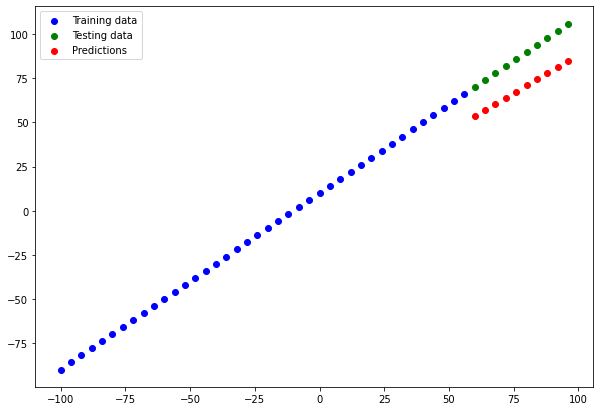

In [ ]:
# Make and plot predictions for model_1
Y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, Y_preds_1)
mse_1 = mse(Y_test, Y_preds_1)
mae_1, mse_1

(18.745327, 353.57336)

In [ ]:
# Build model_2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_2.fit(X_train,Y_train, epochs=100 ,verbose=0)

1/1 [==============================] - 0s 54ms/step


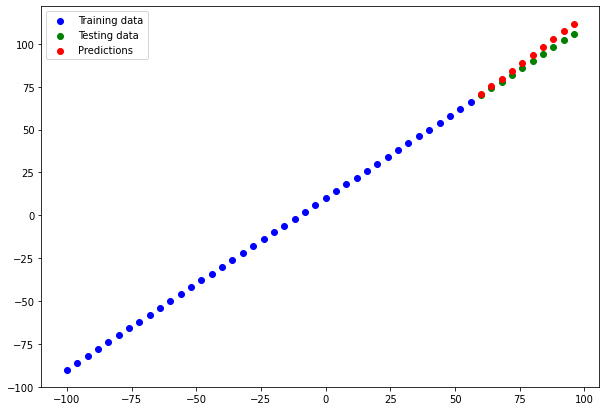

In [ ]:
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, Y_preds_2)
mse_2 = mse(Y_test, Y_preds_2)
mae_2, mse_2

(3.19694, 13.070127)

In [ ]:
# Build model_3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(X_train,Y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 50ms/step


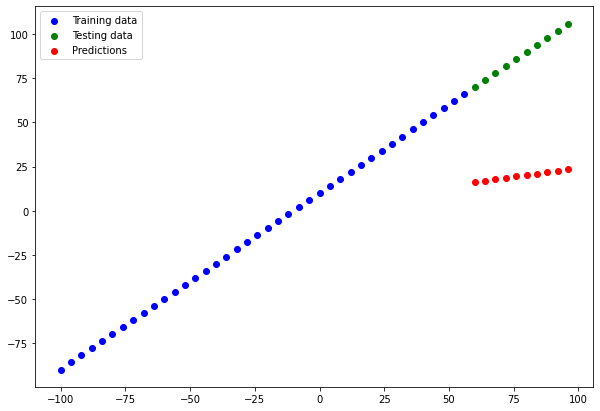

In [ ]:
Y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, Y_preds_3)
mse_3 = mse(Y_test, Y_preds_3)
mae_3, mse_3

(68.149315, 4729.35)

> **You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.**

### Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
# Let's Compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1,mse_1],["model_2",mae_2,mse_2],["model_3",mae_3,mse_3]]

all_results = pd.DataFrame(model_results, columns=["Model","MAE","MSE"])
all_results

,Model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.149315,4729.350098


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lost of experiments.else

Luckily, there are tools to help up!

**Resource:** But as you build more models, you'll want to look into using tools such as:

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving Our Model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. The SavedModel format (default).
2.The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save model using the SavedModel format
model_2.save("model_2_first_model")

In [ ]:
# Save model using the HDF5 format
model_2.save("model_2_first_model.h5")

## Loading a saved model

In [ ]:
# Load in the SavedModel format model

model_2_SavedModel_format = tf.keras.models.load_model("model_2_first_model")
model_2_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
model_2_SavedModel_format_preds = model_2_SavedModel_format.predict(X_test)
model_2_preds == model_2_SavedModel_format_preds

1/1 [==============================] - 0s 86ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
model_2_h5_format = tf.keras.models.load_model("/content/model_2_first_model.h5")
model_2_h5_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with h5 format model predictions
model_2_h5_format_preds = model_2_h5_format.predict(X_test)
model_2_preds == model_2_h5_format_preds

1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("model_2_first_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A larger example

In [ ]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode out DataFrame so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X & Y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
Y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View Y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results od the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
# Let's improve our model #2
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=["mae"])
insurance_model_2.fit(X_train,y_train,epochs=100, verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3178.5134 - mae: 3178.5134


[3178.513427734375, 3178.513427734375]

In [ ]:
# Let's improve our model
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=["mae"])
history = insurance_model_3.fit(X_train,y_train,epochs=120, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1757.2424 - mae: 1757.2424


[1757.242431640625, 1757.242431640625]

Text(0.5, 0, 'epochs')

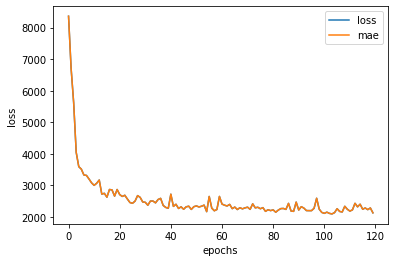

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

## Preprocessing data (normalization and standardization)

In terms od scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, your could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


> To prepare our data, We can borrow a few classes from Scikit-Learn

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
* MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
* OneHotEncoder - one hot encode the non-numerical columns.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Turn all values in the column to 0 or 1.
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X & Y
X= insurance.drop("charges",axis=1)
Y= insurance["charges"]

# Build our train and test sets
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Let's build new model to see if there is imporve with our new organized data.
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='softsign'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(loss=tf.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                               metrics=["mae"])
history = insurance_model_normal.fit(X_train_normal,Y_train, epochs=300, verbose=0)


In [ ]:
# Evaluating our new organized model
insurance_model_normal.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1491.5172 - mae: 1491.5172


[1491.5172119140625, 1491.5172119140625]

Text(0.5, 0, 'epochs')

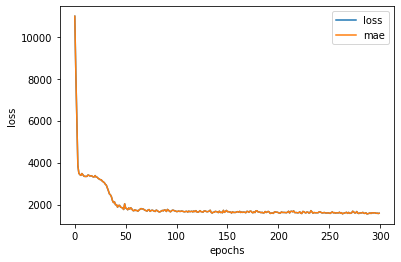

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")